In this project, the features in the provided dataset are used to predict  (using logistic regression) whether the patient has a benign or malignant tumor.


In [1]:
#importing the libraries
import pandas as pd
import numpy as np

In [2]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
# Logistic Regression model
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
# fit() function do gradienct descent and train the model
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros((self.n, 1))
        self.bias = 0
        y = y.reshape(self.m, 1)
        self.losses = []

        for _ in range(self.iterations):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function
            y_pred = sigmoid(linear_model)

            # Gradien computation by minimising the loss
            dw = (1 / self.m) * np.dot(X.T, (y_pred - y))
            db = (1 / self.m) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute and store the loss
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)

    #Calculate the probability by using the sigmoid function
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    # Prediction based on the model
    def predict(self, X):
        y_pred = self.predict_proba(X)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_class).flatten()

    #For the loss calculation (log loss)
    def compute_loss(self, y, y_pred):
        m = y.shape[0]
        loss = -1/m * (np.dot(y.T, np.log(y_pred)) + np.dot((1 - y).T, np.log(1 - y_pred)))
        return loss[0,0]


In [17]:
# Load the dataset
data = pd.read_csv('data.csv') # dataset is taken from the kaggel.
                               # It is a dataset of Breast Cancer patients with Malignant and Benign tumor.

# Drop the unnecessary columns
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

# Encode the target variable. 1 for malignant (M) and 0 for  benign (B)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [5]:
# Split the data into features and target
X = data.drop('diagnosis', axis=1).values #values function is used for pandas and in pandas axis=1 referes to the coloumn
y = data['diagnosis'].values
# print(X,y)

In [6]:
# Split the dataset into training and testing sets
split_ratio = 0.8
split = int(split_ratio * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [7]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [8]:
# Create and train the Logistic Regression model
model = LogisticRegression(learning_rate=0.01, iterations=10000)
model.fit(X_train, y_train)

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [10]:
# Confusion matrix

conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
Predicted   0   1
Actual           
0          85   3
1           0  26


In [11]:
def classification_report(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    report = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }

    return report


In [12]:
# Print classification report
report = classification_report(y_test, y_pred)
print('Accuracy:', report['accuracy'])
print('Precision:', report['precision'])
print('Recall:', report['recall'])
print('F1 Score:', report['f1_score'])


Accuracy: 0.9736842105263158
Precision: 0.896551724137931
Recall: 1.0
F1 Score: 0.9454545454545454


In [13]:
# Function to make a prediction for new input data
def make_prediction(model, new_data):
    new_data = (new_data - mean) / std  # Standardize the new data
    prediction = model.predict(new_data)
    return prediction

Prediction for new data: [0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1
 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0]


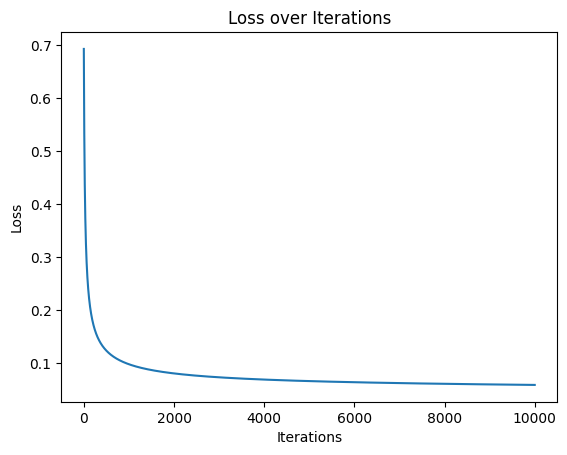

In [14]:
# Example of making a prediction on new data


new_data=X_test  #Here Test data is used for demo purpose only

prediction = make_prediction(model, new_data)
print('Prediction for new data:', prediction)

# Print the loss over iterations
import matplotlib.pyplot as plt

plt.plot(model.losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()